In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
#Reading in data with the suppression flags
df_suppress = pd.read_csv('Data/Final_Suppress_Features.txt', sep='\t')
df_suppress.head()

,npi,nppes_provider_gender,specialty_description,medicare_prvdr_enroll_status,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,ge65_suppress_flag,...,exclusion_flag,state,nppes_credentials,total_30_day_per_claim,drug_cost_per_claim,day_supply_per_claim,female_count,male_count,nondual_count,dual_count
0,1770515488,1,Physical Medicine,3,629.0,654.0,44696.90,15538.0,204.0,1,...,0,NY,Optometrist,1.039746,71.060254,24.702703,2,2,2,2
1,1174060784,2,Nurse,3,673.0,727.0,25846.34,19758.0,65.0,1,...,0,NY,Nurse,1.080238,38.404666,29.358098,2,2,2,2
2,1265525273,1,Optometry/Ophthalmology,3,9103.0,10068.9,334417.10,257126.0,1481.0,1,...,0,AT,Medical Doctor,1.106108,36.737021,28.246292,2,2,2,2
3,1306821152,1,Cardiologist,3,1359.0,3290.3,89341.59,98467.0,288.0,1,...,0,NY,Medical Doctor,2.421118,65.740684,72.455482,2,2,2,2
4,1134244007,2,Internal Medicine,3,53.0,53.2,3391.01,579.0,25.0,3,...,0,FL,Medical Doctor,1.003774,63.981321,10.924528,1,1,1,1


In [3]:
df_suppress.columns

Index(['npi', 'nppes_provider_gender', 'specialty_description',
       'medicare_prvdr_enroll_status', 'total_claim_count',
       'total_30_day_fill_count', 'total_drug_cost', 'total_day_supply',
       'bene_count', 'ge65_suppress_flag', 'bene_count_ge65_suppress_flag',
       'brand_suppress_flag', 'generic_suppress_flag', 'other_suppress_flag',
       'mapd_suppress_flag', 'pdp_suppress_flag', 'lis_suppress_flag',
       'nonlis_suppress_flag', 'opioid_claim_count', 'opioid_drug_cost',
       'opioid_day_supply', 'opioid_bene_count', 'opioid_prescriber_rate',
       'la_opioid_claim_count', 'la_opioid_drug_cost', 'la_opioid_day_supply',
       'la_opioid_bene_count', 'la_opioid_prescriber_rate',
       'antibiotic_claim_count', 'antibiotic_drug_cost',
       'antibiotic_bene_count', 'antipsych_ge65_suppress_flag',
       'antipsych_bene_ge65_suppress_flg', 'average_age_of_beneficiaries',
       'beneficiary_average_risk_score', 'EXCLYear', 'REINYear', 'excl_type',
       'exclusion

In [4]:
#Dropping all columns that are not possible features or the outcome or which are categorical
df_suppress_features = df_suppress.drop(columns=['npi', 'EXCLYear', 'REINYear', 'excl_type', 'specialty_description', 'state', 'nppes_credentials'])
df_suppress_features.shape

(5000, 41)

## Feature Selection

There is the possibility of 40 features. Most likely all of these features are not strong predictors of the outcome (exclusion from Medicare) so will most likely want to filter these features down before running our final model. Will start looking at all together by using Radviz.

In [5]:
#Selecting target column separate from features
features_2 = df_suppress_features.drop(columns = ['exclusion_flag']).columns
X = df_suppress_features[features_2].values
y = df_suppress_features['exclusion_flag'].values

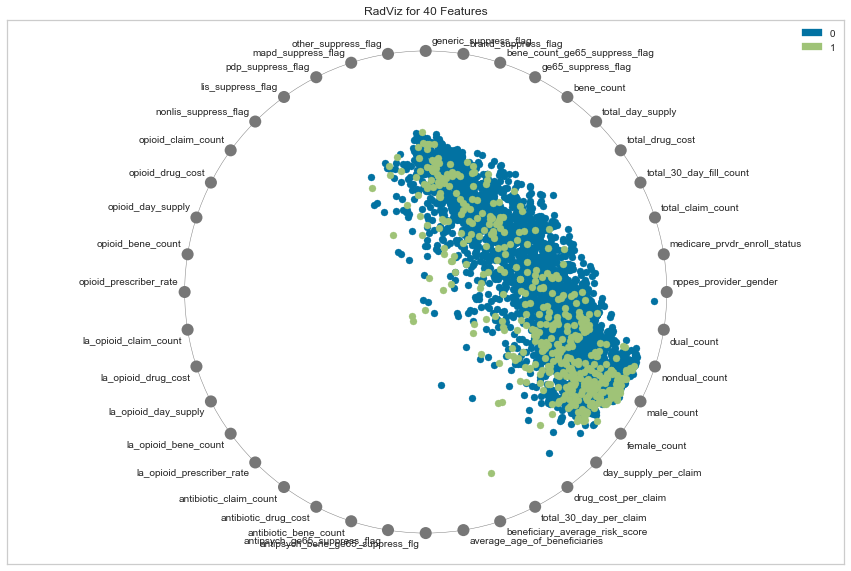

In [6]:
from yellowbrick.features import RadViz
# Specify the target classes
classes = ['0', '1']

# Instantiate the visualizer
visualizer = RadViz(classes=classes, features=features_2, size=(1080, 720))

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Draw the data

## Regularization

Looks like too much noise is included so will look at Regularization techniques to look at the overall importance of these features in a couple different ways

In [7]:
features_3 = df_suppress_features[features_2]
labels = df_suppress_features['exclusion_flag']

In [8]:
#Using Lasso Regularization
model = Lasso(tol = 0.001)
model.fit(features_3, labels)
print(list(zip(features_3, model.coef_.tolist())))

[('nppes_provider_gender', -0.0), ('medicare_prvdr_enroll_status', -0.0), ('total_claim_count', 1.9571660691424238e-05), ('total_30_day_fill_count', -4.28092932305434e-05), ('total_drug_cost', 1.0973079461181432e-08), ('total_day_supply', 1.0791228107031819e-06), ('bene_count', -7.124602526342238e-05), ('ge65_suppress_flag', -0.0), ('bene_count_ge65_suppress_flag', -0.0), ('brand_suppress_flag', 0.0), ('generic_suppress_flag', -0.0), ('other_suppress_flag', 0.0), ('mapd_suppress_flag', 0.0), ('pdp_suppress_flag', 0.0), ('lis_suppress_flag', 0.0), ('nonlis_suppress_flag', -0.0), ('opioid_claim_count', -0.0), ('opioid_drug_cost', -9.96603020742136e-07), ('opioid_day_supply', 6.376551454140049e-06), ('opioid_bene_count', -0.0), ('opioid_prescriber_rate', -0.0), ('la_opioid_claim_count', -0.0), ('la_opioid_drug_cost', 2.7465610062733103e-06), ('la_opioid_day_supply', -1.607067808143407e-05), ('la_opioid_bene_count', 0.0), ('la_opioid_prescriber_rate', 0.0), ('antibiotic_claim_count', -0.0)

In [9]:
#Applying Ridge Regression
model = Ridge()
model.fit(features_3, labels)
print(list(zip(features_3, model.coef_.tolist())))

[('nppes_provider_gender', -0.09504375553125544), ('medicare_prvdr_enroll_status', -0.2206119247911582), ('total_claim_count', 5.392630433836534e-06), ('total_30_day_fill_count', -1.006660053498885e-05), ('total_drug_cost', 1.2342518978116272e-08), ('total_day_supply', 1.8404504430710488e-07), ('bene_count', -8.216559412999424e-05), ('ge65_suppress_flag', 0.0025640495995891523), ('bene_count_ge65_suppress_flag', -0.0010608695274298933), ('brand_suppress_flag', 0.019206971394619885), ('generic_suppress_flag', -0.005641708398922497), ('other_suppress_flag', -0.025689246196357114), ('mapd_suppress_flag', 0.004857157733346224), ('pdp_suppress_flag', 0.012956309962707534), ('lis_suppress_flag', 0.0038467332916022846), ('nonlis_suppress_flag', -0.0060942780088399295), ('opioid_claim_count', 0.00029073448234533166), ('opioid_drug_cost', -6.067253316469032e-07), ('opioid_day_supply', -2.4839176242396434e-06), ('opioid_bene_count', -0.0005210558211937608), ('opioid_prescriber_rate', 0.000481082

In [10]:
#Applying ElasticNet
model = ElasticNet(tol = 0.1)
model.fit(features_3, labels)
print(list(zip(features_3, model.coef_.tolist())))

[('nppes_provider_gender', -0.0), ('medicare_prvdr_enroll_status', -0.0), ('total_claim_count', 2.1782212767673396e-05), ('total_30_day_fill_count', -4.863631113322388e-05), ('total_drug_cost', 1.629768200877684e-08), ('total_day_supply', 1.2613661542635663e-06), ('bene_count', -0.00010540398970016658), ('ge65_suppress_flag', -0.0), ('bene_count_ge65_suppress_flag', -0.0), ('brand_suppress_flag', 0.0), ('generic_suppress_flag', -0.0), ('other_suppress_flag', 0.0), ('mapd_suppress_flag', 0.0), ('pdp_suppress_flag', 0.0), ('lis_suppress_flag', 0.0), ('nonlis_suppress_flag', -0.0), ('opioid_claim_count', -0.0), ('opioid_drug_cost', -1.0253737345989753e-06), ('opioid_day_supply', 6.588617333231134e-06), ('opioid_bene_count', 0.0), ('opioid_prescriber_rate', -0.0), ('la_opioid_claim_count', -0.0), ('la_opioid_drug_cost', 2.810029314172946e-06), ('la_opioid_day_supply', -1.689281241103598e-05), ('la_opioid_bene_count', 0.0), ('la_opioid_prescriber_rate', 0.0), ('antibiotic_claim_count', -0.0

## Transformer Methods

In [11]:
model = Lasso(tol=.001)
sfm = SelectFromModel(model)
sfm.fit(features_3, labels)
print(list(features_3.iloc[:, sfm.get_support(indices=True)]))

['total_claim_count', 'total_30_day_fill_count', 'bene_count', 'la_opioid_day_supply']


In [12]:
model = Ridge()
sfm = SelectFromModel(model)
sfm.fit(features_3, labels)
print(list(features_3.iloc[:, sfm.get_support(indices=True)]))

['nppes_provider_gender', 'medicare_prvdr_enroll_status', 'other_suppress_flag', 'antipsych_bene_ge65_suppress_flg', 'total_30_day_per_claim']


In [13]:
model = ElasticNet(tol=.1)
sfm = SelectFromModel(model)
sfm.fit(features_3, labels)
print(list(features_3.iloc[:, sfm.get_support(indices=True)]))

['total_claim_count', 'total_30_day_fill_count', 'bene_count', 'opioid_day_supply', 'la_opioid_day_supply', 'drug_cost_per_claim']


## Correlation Matrix

To ensure we don't miss any strongly correlated features with our outcome, will also include any features with a correlations with our outcome that is greater than 0.1

In [14]:
#Looking at correlations with outcome variable using spearman
correlations_spearman = df_suppress_features.corr(method='spearman')
corr_spear = correlations_spearman['exclusion_flag']
corr_spear.sort_values()

medicare_prvdr_enroll_status       -0.330336
nppes_provider_gender              -0.165787
average_age_of_beneficiaries       -0.110381
antibiotic_bene_count              -0.074774
antibiotic_claim_count             -0.067849
male_count                         -0.040009
female_count                       -0.040009
antibiotic_drug_cost               -0.038685
bene_count                         -0.030761
opioid_prescriber_rate             -0.024698
generic_suppress_flag              -0.023021
bene_count_ge65_suppress_flag      -0.020738
ge65_suppress_flag                 -0.020320
opioid_bene_count                  -0.010510
nonlis_suppress_flag               -0.009022
nondual_count                      -0.005176
dual_count                         -0.005176
lis_suppress_flag                  -0.003305
opioid_claim_count                  0.000702
brand_suppress_flag                 0.006873
other_suppress_flag                 0.013195
total_30_day_per_claim              0.014427
opioid_dru

In [15]:
#Selecting the features from all three of the transformers, the categorical features (as seen in previous visualizations)
#there seem to be some correlations within them), any additional features with a spearman correlation > absolute value 
#of 0.1 and features flagged in earlier analysis where they may be differences when looking at their distributions
keep = ['specialty_description', 'state', 'nppes_credentials', 'nppes_provider_gender', 
        'medicare_prvdr_enroll_status', 'other_suppress_flag', 'antipsych_bene_ge65_suppress_flg', 
        'total_30_day_per_claim', 'total_claim_count', 'total_30_day_fill_count', 'bene_count', 'opioid_day_supply', 
        'la_opioid_day_supply', 'drug_cost_per_claim', 'average_age_of_beneficiaries', 'day_supply_per_claim', 'exclusion_flag']

In [16]:
#Saving as new dataset
Model_suppress = df_suppress[keep]
Model_suppress.shape

(5000, 17)

In [17]:
Model_suppress.to_csv('Data/Model_suppress.txt', sep='\t', index=False)